In [1123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0, j1, jv, i0
from scipy.special import jn_zeros
from scipy.integrate import quad
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

## Constants and math functions

In [1124]:
H = 2
R = 1

z = np.linspace(0, H, 50)
r = np.linspace(0, R, 50)

max_k = 30
max_n = 100

In [1125]:
def I0(x):
    return i0(x)

def J0(x):
    return j0(x)

def J1(x):
    return j1(x)

def J2(x):
    return jv(2, x)

def find_beta_k_roots(max_k, R=1):
    # Находим первые max_k нулей функции Бесселя первого порядка J1
    j1_zeros = jn_zeros(1, max_k)
    # Вычисляем соответствующие β_k = j1_zero / R
    roots = j1_zeros / R
    return roots

In [1126]:
G = 80
LAMBDA = 120
mu_0 = (LAMBDA + G)/G
alpha = 45.0  

def a_k(k):
    return np.pi*(2 * k + 1) / 2

def lambda_n(n):
    return (np.pi * n) / H 

beta_k = find_beta_k_roots(max_k, R)

## Solutions

### Function $T$ of temperature

The solution of the mathematical model of the heat conduction problem
$$
T(r, z)=\sum^\infty_0\frac{I_0(a_kr)}{I_0(a_kR)}f_ksin(a_kz)
$$
Where
$$ 
f_k=\int^H_0f(z)sin(a_kz)dz 
$$

In [1127]:
def f(z):
    return -z**2+H*z

def f_k(k):
    integrand = lambda z: f(z) * np.sin(a_k(k) * z)
    integral = quad(integrand, 0, H)[0]
    return integral

In [1128]:
f_k_array = np.empty(max_k)
for k in range(1, max_k+1):
    result = f_k(k)
    f_k_array[k-1] = result 

In [1129]:
def T(r, z, max_k):
    sum= 0.0
    for k in range(0, max_k + 1):
        ak = a_k(k)
        sum += (f_k_array[k-1] / I0(ak * R)) * I0(ak * r) * np.sin(ak * z)
    return (2 / H) * sum

$$
T_{nk}=\int^R_0J_0(\beta_kr)rdr\int^H_0T(r,z)cos(\lambda_nz)dz \\
\lambda_n=\frac{\pi n}{2},\ \ n=0,1,... \\
\beta_k \text{ - solutions of the equation: } J_0(\beta_kR)=0 
$$

In [1130]:
def T_nk(n, k, T_func, max_k):
    """
    Возвращает двойной интеграл
        ∫_{r=0}^R ∫_{z=0}^H T(r,z) * J0(beta_k[k] * r) * r * cos(lambda_n(n) * z) dz dr
    """
    # Функция для dblquad: первый аргумент — z, второй — r
    def integrand(z, r):
        return T_func(r, z, max_k) * j0(beta_k[k-1]) * r * np.cos(lambda_n(n) * z)

    # dblquad ожидает порядок: dblquad(func, r_min, r_max, z_min_fun, z_max_fun)
    result, error = dblquad(integrand,
                            0,     # r от 0
                            R,     # до R
                            lambda r: 0,  # для каждого r, z от 0
                            lambda r: H)  # до H
    return result

In [1131]:
T_nk_array = np.empty([max_n, max_k])
for n in range(1, max_n+1):
    for k in range(1, max_k+1):
        result = T_nk(n, k, T, max_k)
        print(n, k)
        T_nk_array[n-1, k-1] = result
print(T_nk_array)

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
8 1
8 2
8 3
8

### Functions $u(r, z)$ and $w(r, z)$

$$
u(r,z)=\frac{4\mu_0\alpha}{HR^2}
\left(\sum_{k=1}^\infty \frac{\beta_k}{\left(\beta^2_k+\lambda^2_n\right)}  \frac{J_1(\beta_{k}r)}{J_0^2(\beta_{k}R)}T_{0k}
+2\sum_{k=1}^{\infty}\frac{J_1(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{k=1}^\infty \frac{\beta_k}{\left(\beta^2_k+\lambda^2_n\right)} 
cos(\lambda_nz)\right)T_{nk}
$$

In [1132]:
def u(r, z, max_k, max_n):
    sum_u = 0.0
    for k in range(1, max_k + 1):
        sum_u += (1 / beta_k[k-1]) * (J1(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2) * T_nk_array[0, k-1]
    for n in range(1, max_n + 1):
        for k in range(1, max_k + 1):
            sum_u += 2 * (J1(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2) * (beta_k[k-1] / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.cos(lambda_n(n) * z) * T_nk_array[n-1, k-1]
    return (4 * mu_0 * alpha) / (H * R**2) * sum_u

$$
w(r,z)
=-\frac{8\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_0(\beta_{0k}r)}{J_0^2(\beta_{0k}R)}
\sum_{n=1}^\infty \frac{\lambda_n}{\left(\beta^2_k+\lambda^2_n\right)} sin(\lambda_nz)T_{nk}
$$

In [1133]:
def w(r, z, max_k, max_n):
    sum_w = 0.0
    for k in range(1, max_k + 1):
        for n in range(1, max_n + 1):
            sum_w += np.sin(lambda_n(n) * z) * (J0(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2) * (lambda_n(n) / (beta_k[k-1]**2 + lambda_n(n)**2)) * T_nk_array[n-1, k-1]
    return (-8 * mu_0 * alpha) / (H * R**2) * sum_w

### Partial derivative's $u(r, z)$

$$
\frac{\partial u}{\partial r}(r,z)
=\frac{4\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_0(\beta_{k}r)-J_2(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{n=0}^\infty \frac{\beta_k}{\left(\beta^2_k+\lambda^2_n\right)} 
cos(\lambda_nz)T_{nk}
$$

In [1134]:
def partial_u_r(r, z, max_k, max_n):
    sum_u_r = 0.0
    for k in range(1, max_k + 1):
        for n in range(0, max_n + 1):
            sum_u_r += (J0(beta_k[k-1] * r) - J2(beta_k[k-1] * r)) / J0(beta_k[k-1] * R)**2 * (beta_k[k-1] / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.cos(lambda_n(n) * z) * T_nk_array[n-1, k-1]
    return (4 * mu_0 * alpha) / (H * R**2) * sum_u_r

$$
\frac{\partial u}{\partial z}(r,z)
=-\frac{8\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_1(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{n=1}^\infty \frac{\lambda_n\beta_k}{\left(\beta^2_k+\lambda^2_n\right)} sin(\lambda_nz)T_{nk}
$$

In [1135]:
def partial_u_z(r, z, max_k, max_n):
    sum_u_z = 0.0
    for k in range(1, max_k + 1):
        for n in range(1, max_n + 1):
            sum_u_z += J1(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2 * (lambda_n(n) * beta_k[k-1] / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.sin(lambda_n(n) * z)  * T_nk_array[n-1, k-1]
    return (-8 * mu_0 * alpha) / (H * R**2) * sum_u_z

### Partial derivative's $w(r, z)$

$$
\frac{\partial w}{\partial r}(r,z)
=\frac{8\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_1(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{n=1}^\infty \frac{\lambda_n}{\left(\beta^2_k+\lambda^2_n\right)} sin(\lambda_nz)T_{nk}
$$

In [1136]:
def partial_w_r(r, z, max_k, max_n):
    sum_w_r = 0.0
    for k in range(1, max_k + 1):
        for n in range(1, max_n + 1):
            sum_w_r += J1(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2 * (lambda_n(n) / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.sin(lambda_n(n) * z) * T_nk_array[n-1, k-1]
    return (8 * mu_0 * alpha) / (H * R**2) * sum_w_r

$$
\frac{\partial w}{\partial z}(r,z)
=-\frac{8\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_0(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{n=1}^\infty \frac{\lambda^2_n}{\left(\beta^2_k+\lambda^2_n\right)} cos(\lambda_nz)T_{nk}
$$

In [1137]:
def partial_w_z(r, z, max_k, max_n):
    sum_w_z = 0.0
    for k in range(1, max_k + 1):
        for n in range(1, max_n + 1):
            sum_w_z += J0(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2 * (lambda_n(n)**2 / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.cos(lambda_n(n) * z) * T_nk_array[n-1, k-1]
    return (-8 * mu_0 * alpha) / (H * R**2) * sum_w_z

In [1138]:
def teta(r, z, max_k, max_n):
    return partial_u_r(r, z, max_k, max_n) + 1/r * u(r, z, max_k, max_n) + partial_w_r(r, z, max_k, max_n)

In [ ]:
def sigma_r(r, z, max_k, max_n):
    return 2 * G * (partial_u_r(r, z, max_k, max_n) + mu_0/(1-2*mu_0)*teta(r, z, max_k, max_n))

In [ ]:
def sigma_z(r, z, max_k, max_n):
    return 2 * G * (partial_w_z(r, z, max_k, max_n) + mu_0/(1-2*mu_0)*teta(r, z, max_k, max_n))

## Plot boundary conditions

In [1141]:
def plot2d(x, y, xlim, xlabel="", ylabel="", title="", plot=plt):
    plot.plot(x, y)
    if plot is plt:
        plot.xlim(0, xlim)
        plot.xlabel(xlabel)
        plot.ylabel(ylabel)
        plot.title(title)
    else:
        plot.grid()
        plot.set_xlim(0, xlim)
        plot.set_xlabel(xlabel)
        plot.set_ylabel(ylabel)
        plot.set_title(title)


$$w(r, 0)=0$$
$$\frac{\partial u}{\partial z}|_{z=0}=0$$
$$w(r, H)=0$$
$$\frac{\partial u}{\partial z}|_{z=H}=0$$
$$u(R, z)=0$$
$$\frac{\partial w}{\partial r}|_{r=R}=0$$

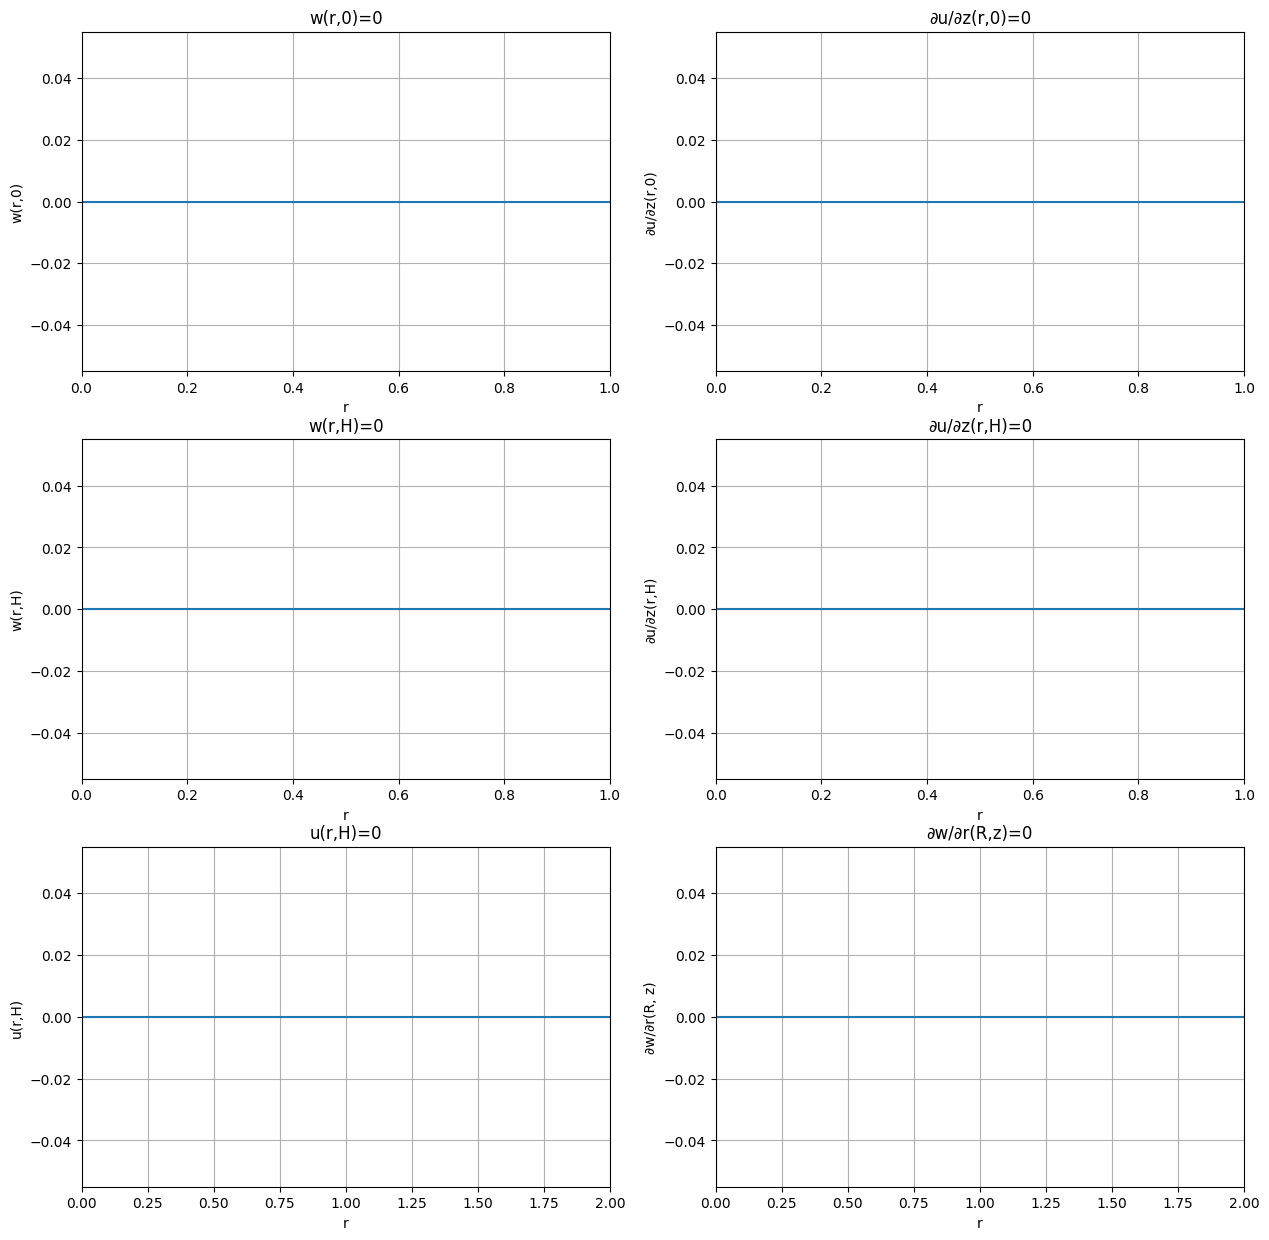

In [1142]:
figure, axis = plt.subplots(3, 2)
figure.set_figheight(15)
figure.set_figwidth(15)

plot2d(r, w(r, 0, max_k, max_n), R, "r", "w(r,0)", "w(r,0)=0", axis[0, 0])
plot2d(r, partial_u_z(r, 0, max_k, max_n), R, "r", "∂u/∂z(r,0)", "∂u/∂z(r,0)=0", axis[0, 1])
plot2d(r, np.round(w(r, H, max_k, max_n), 9), R, "r", "w(r,H)", "w(r,H)=0", axis[1, 0])
plot2d(r, np.round(partial_u_z(r, H, max_k, max_n), 9), R, "r", "∂u/∂z(r,H)", "∂u/∂z(r,H)=0", axis[1, 1]) 
plot2d(z, np.round(u(R, z, max_k, max_n), 9), H, "r", "u(r,H)", "u(r,H)=0", axis[2, 0])
plot2d(z, np.round(partial_w_r(R, z, max_k, max_n), 9), H, "r", "∂w/∂r(R, z)", "∂w/∂r(R,z)=0", axis[2, 1])

## Plot solutions

In [1143]:
def plot3d(r, z, f, rlabel='r', zlabel='z', title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim(r[0], r[-1])
    ax.set_ylim(z[0], z[-1])
    
    r3d, z3d = np.meshgrid(r, z)
    
    print(np.max(f(r3d, z3d, max_k, max_n)))

    ax.plot_surface(r3d, z3d, np.round(f(r3d, z3d, max_k, max_n), 9), cmap='viridis')

    ax.set_title(title)
    ax.set_xlabel(rlabel)
    ax.set_ylabel(zlabel)

1.0539472710283686


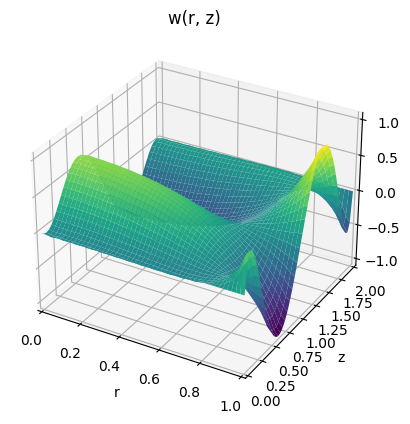

In [1144]:
plot3d(r, z, w, title="w(r, z)")

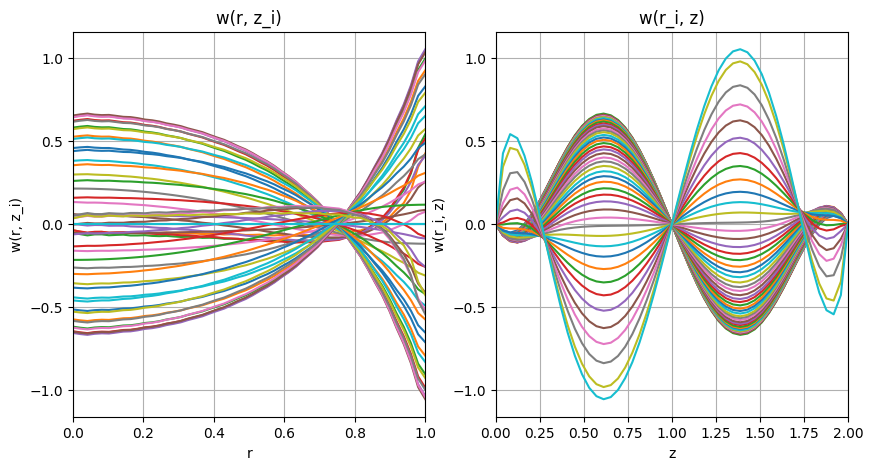

In [1145]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(w(r, i, max_k, max_n), 9), R, "r", "w(r, z_i)", "w(r, z_i)", plot=axis[0])

for i in r:
    plot2d(z, np.round(w(i, z, max_k, max_n), 9), H, "z", "w(r_i, z)", "w(r_i, z)", plot=axis[1])

0.6417574425853795


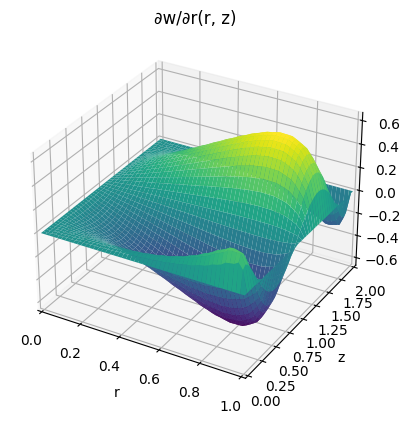

In [1146]:
plot3d(r, z, partial_w_r, title="∂w/∂r(r, z)")

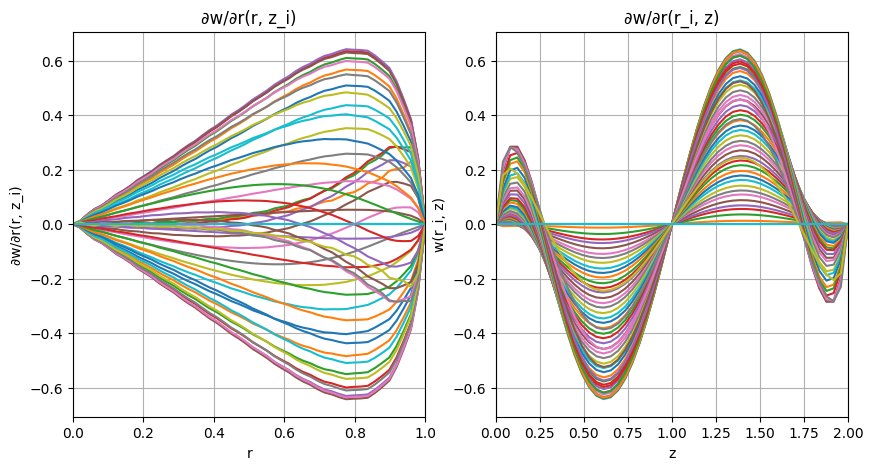

In [1147]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(partial_w_r(r, i, max_k, max_n), 9), R, "r", "∂w/∂r(r, z_i)", "∂w/∂r(r, z_i)", plot=axis[0])
    
for i in r:
    plot2d(z, np.round(partial_w_r(i, z, max_k, max_n), 9), H, "z", "w(r_i, z)", "∂w/∂r(r_i, z)", plot=axis[1])

16.130738467834963


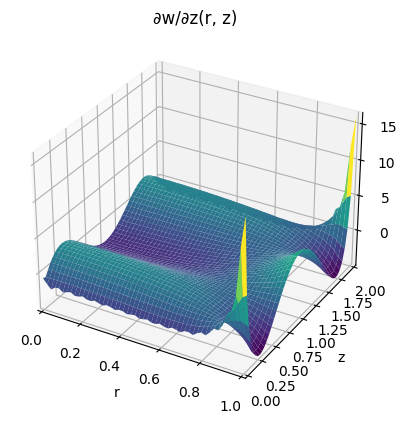

In [1148]:
plot3d(r, z, partial_w_z, title="∂w/∂z(r, z)")

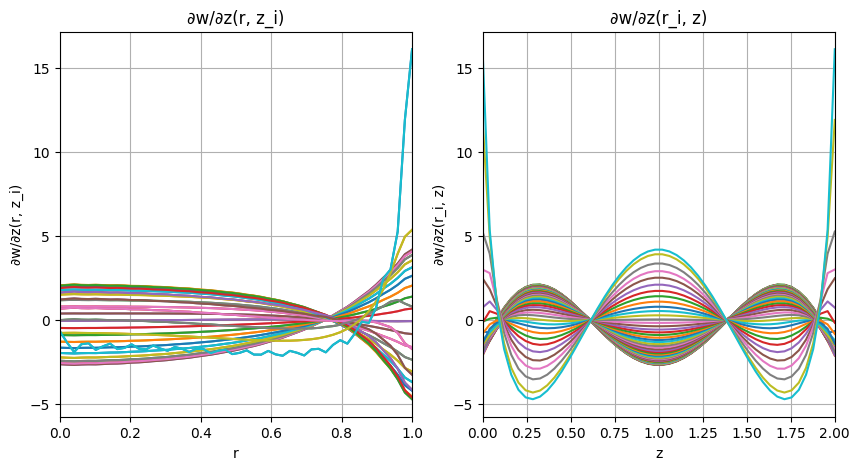

In [ ]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(partial_w_z(r, i, max_k, max_n), 9), R, "r", "∂w/∂z(r, z_i)", "∂w/∂z(r, z_i)", plot=axis[0])
    
for i in r:
    plot2d(z, np.round(partial_w_z(i, z, max_k, max_n), 9), H, "z", "∂w/∂z(r_i, z)", "∂w/∂z(r_i, z)", plot=axis[1])

1.811048234411122


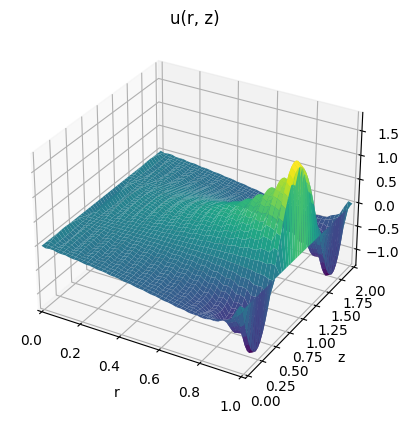

In [1150]:
plot3d(r, z, u, title="u(r, z)")

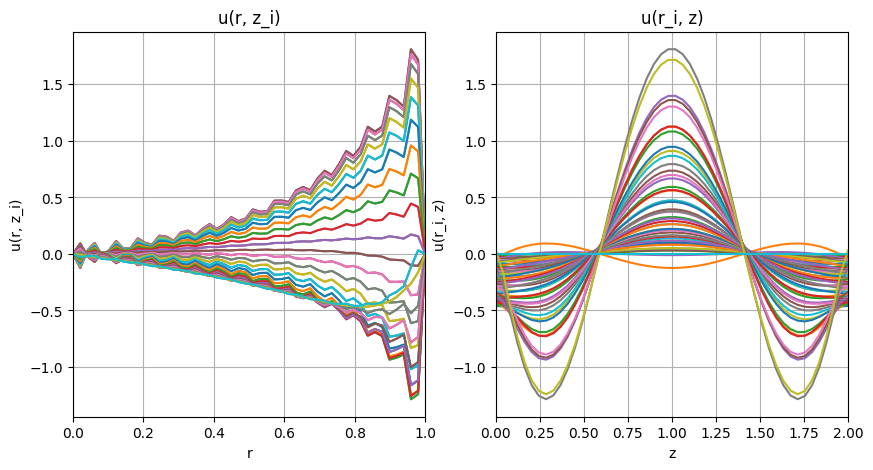

In [1151]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(u(r, i, max_k, max_n), 9), R, "r", "u(r, z_i)", "u(r, z_i)", plot=axis[0])
    
for i in r:
    plot2d(z, np.round(u(i, z, max_k, max_n), 9), H, "z", "u(r_i, z)", "u(r_i, z)", plot=axis[1])

2.4864062633043216


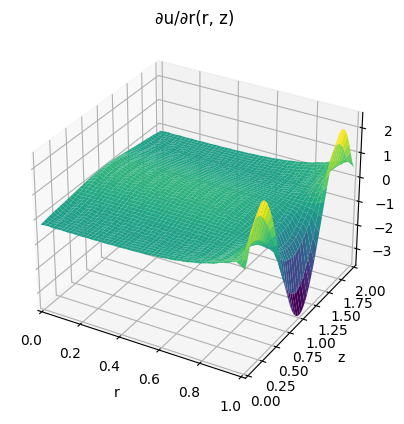

In [1152]:
plot3d(r, z, partial_u_r, title="∂u/∂r(r, z)")

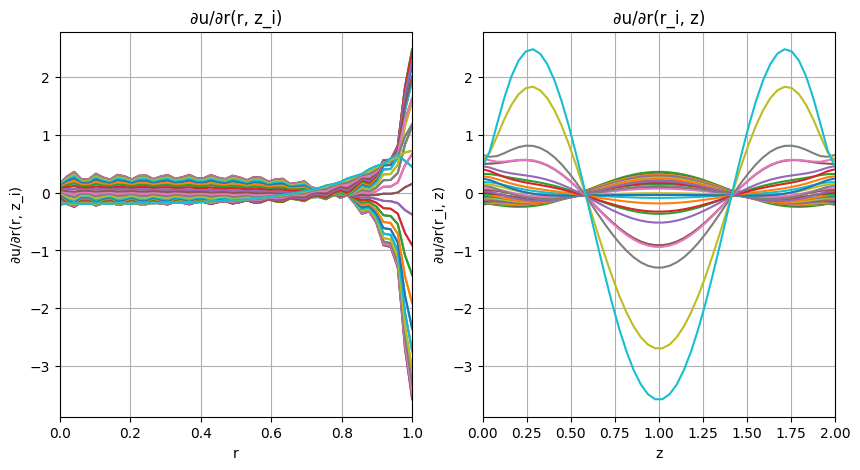

In [1153]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(partial_u_r(r, i, max_k, max_n), 9), R, "r", "∂u/∂r(r, z_i)", "∂u/∂r(r, z_i)", plot=axis[0])
    
for i in r:
    plot2d(z, np.round(partial_u_r(i, z, max_k, max_n), 9), H, "z", "∂u/∂r(r_i, z)", "∂u/∂r(r_i, z)", plot=axis[1])

7.146429789914977


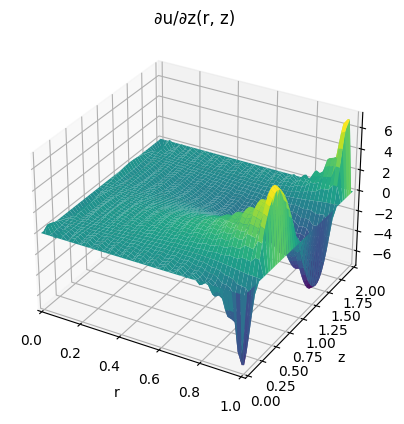

In [1154]:
plot3d(r, z, partial_u_z, title="∂u/∂z(r, z)")

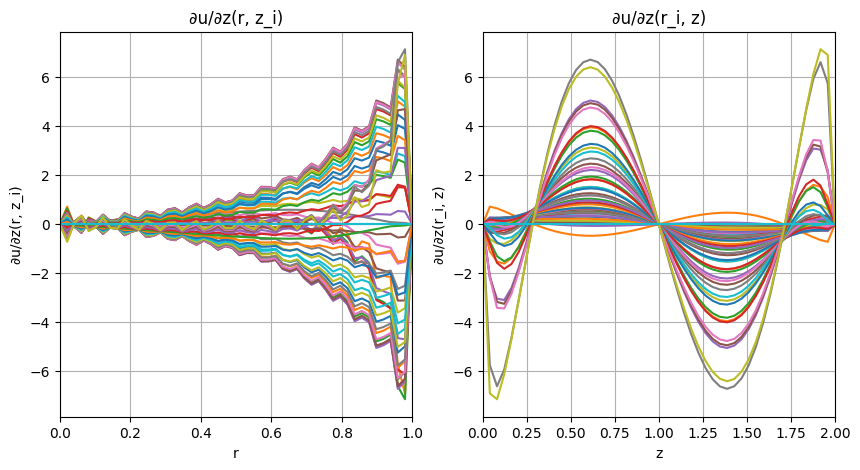

In [1155]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(partial_u_z(r, i, max_k, max_n), 9), R, "r", "∂u/∂z(r, z_i)", "∂u/∂z(r, z_i)", plot=axis[0])
    
for i in r:
    plot2d(z, np.round(partial_u_z(i, z, max_k, max_n), 9), H, "z", "∂u/∂z(r_i, z)", "∂u/∂z(r_i, z)", plot=axis[1])

### Plot voltages functions

In [1156]:
r = r[1:]
z = z[1:]

4.382902539943701


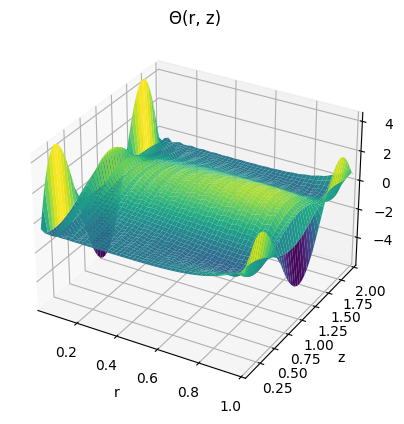

In [1175]:
plot3d(r, z, teta, title="Θ(r, z)")

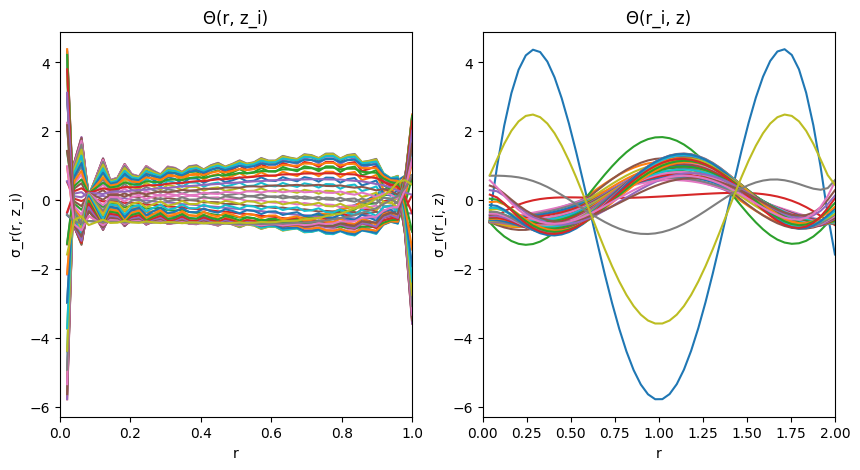

In [1158]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(teta(r, i, max_k, max_n), 9), R, "r", "σ_r(r, z_i)", "Θ(r, z_i)", plot=axis[0])
    
for i in r:
    plot2d(z, np.round(teta(i, z, max_k, max_n), 9), H, "r", "σ_r(r_i, z)", "Θ(r_i, z)", plot=axis[1])

7.786773356564838


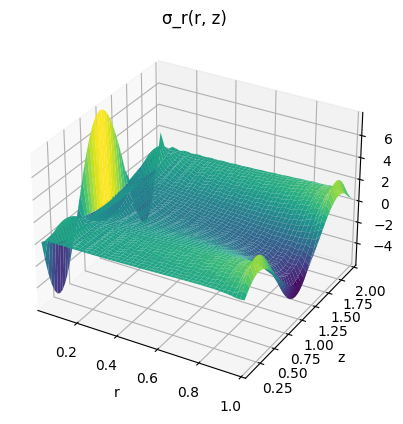

In [1171]:
plot3d(r, z, sigma_r, title="σ_r(r, z)")

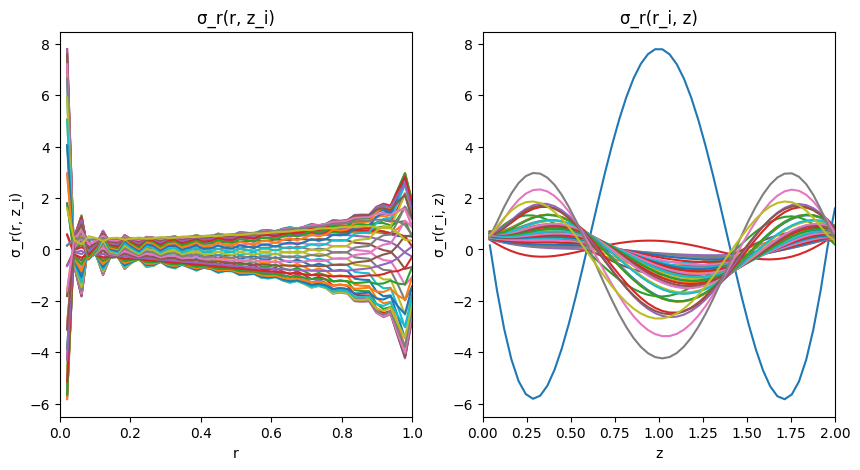

In [1172]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(sigma_r(r, i, max_k, max_n), 9), R, "r", "σ_r(r, z_i)", "σ_r(r, z_i)", plot=axis[0])
    
for i in r:
    plot2d(z, np.round(sigma_r(i, z, max_k, max_n), 9), H, "z", "σ_r(r_i, z)", "σ_r(r_i, z)", plot=axis[1])

31.698123116190487


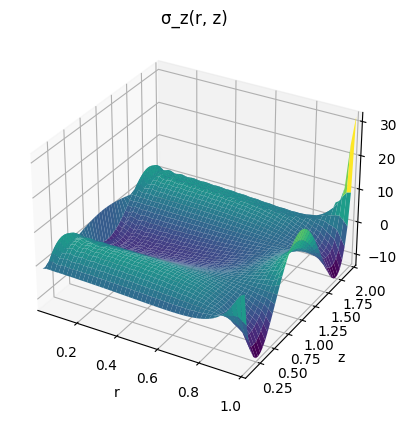

In [1173]:
plot3d(r, z, sigma_z, title="σ_z(r, z)")

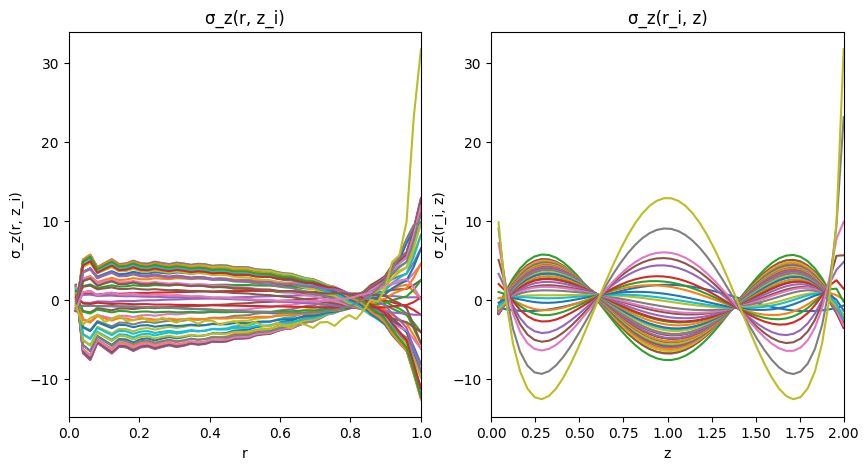

In [1174]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)

axis[0].grid()
axis[1].grid()

for i in z:
    plot2d(r, np.round(sigma_z(r, i, max_k, max_n), 9), R, "r", "σ_z(r, z_i)", "σ_z(r, z_i)", plot=axis[0])
    
for i in r:
    plot2d(z, np.round(sigma_z(i, z, max_k, max_n), 9), H, "z", "σ_z(r_i, z)", "σ_z(r_i, z)", plot=axis[1])

## Cylinder's visualization

In [1163]:
def draw_cylinder(colors=['red', 'blue', 'blue'] ,radius=1, height=2, resolution=30):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Генерация координат для боковой поверхности
    theta = np.linspace(0, 2 * np.pi, resolution)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    z_bottom = np.zeros_like(x)
    z_top = np.ones_like(x) * height
    
    # Рисуем боковую поверхность
    for i in range(len(x) - 1):
        verts = [[(x[i], y[i], z_bottom[i]),
                  (x[i+1], y[i+1], z_bottom[i+1]),
                  (x[i+1], y[i+1], z_top[i+1]),
                  (x[i], y[i], z_top[i])]]
        ax.add_collection3d(Poly3DCollection(verts, color=colors[0], edgecolor='k'))
    
    # Рисуем верхнюю и нижнюю крышки
    ax.add_collection3d(Poly3DCollection([list(zip(x, y, z_bottom))], color=colors[1], edgecolor='k'))
    ax.add_collection3d(Poly3DCollection([list(zip(x, y, z_top))], color=colors[2], edgecolor='k'))
    
    # Настройки осей
    ax.set_xlim([-radius, radius])
    ax.set_ylim([-radius, radius])
    ax.set_zlim([0, height])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1, 1, height / radius])
    
    plt.show()

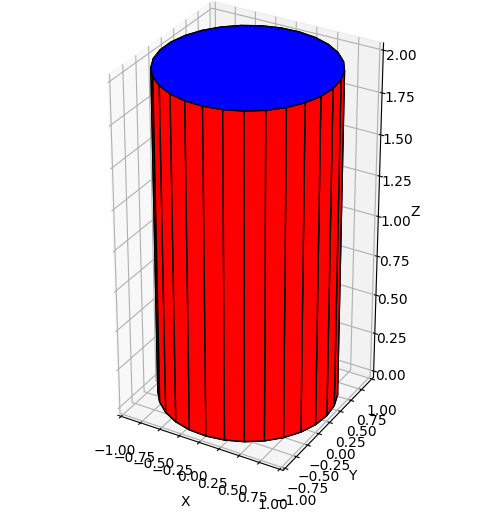

In [1164]:
draw_cylinder()

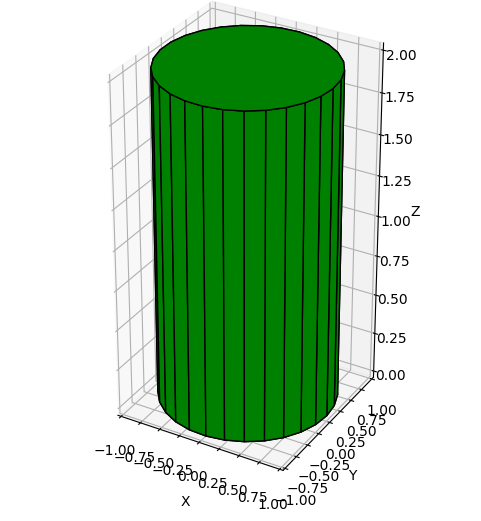

In [1165]:
draw_cylinder(['green', 'green', 'green'])

In [1166]:
def draw_pol_cylinder(outer_radius=1, inner_radius=0.7, height=2, resolution=30):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Генерация координат для внешней и внутренней боковых поверхностей
    theta = np.linspace(0, 2 * np.pi, resolution)
    outer_x = outer_radius * np.cos(theta)
    outer_y = outer_radius * np.sin(theta)
    inner_x = inner_radius * np.cos(theta)
    inner_y = inner_radius * np.sin(theta)
    z_bottom = np.zeros_like(outer_x)
    z_top = np.ones_like(outer_x) * height
    
    # Рисуем внешнюю боковую поверхность
    for i in range(len(outer_x) - 1):
        verts = [[(outer_x[i], outer_y[i], z_bottom[i]),
                  (outer_x[i+1], outer_y[i+1], z_bottom[i+1]),
                  (outer_x[i+1], outer_y[i+1], z_top[i+1]),
                  (outer_x[i], outer_y[i], z_top[i])]]
        ax.add_collection3d(Poly3DCollection(verts, color='green', edgecolor='k'))
    
    # Рисуем внутреннюю боковую поверхность
    for i in range(len(inner_x) - 1):
        verts = [[(inner_x[i], inner_y[i], z_bottom[i]),
                  (inner_x[i+1], inner_y[i+1], z_bottom[i+1]),
                  (inner_x[i+1], inner_y[i+1], z_top[i+1]),
                  (inner_x[i], inner_y[i], z_top[i])]]
        ax.add_collection3d(Poly3DCollection(verts, color='green', edgecolor='k'))
    
    # Рисуем верхнюю и нижнюю крышки как кольца
    ax.add_collection3d(Poly3DCollection([list(zip(outer_x, outer_y, z_bottom)) + list(zip(inner_x[::-1], inner_y[::-1], z_bottom))], color='green', edgecolor='k'))
    ax.add_collection3d(Poly3DCollection([list(zip(outer_x, outer_y, z_top)) + list(zip(inner_x[::-1], inner_y[::-1], z_top))], color='green', edgecolor='k'))
    
    # Настройки осей
    ax.set_xlim([-outer_radius, outer_radius])
    ax.set_ylim([-outer_radius, outer_radius])
    ax.set_zlim([0, height])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1, 1, height / outer_radius])
    
    plt.show()


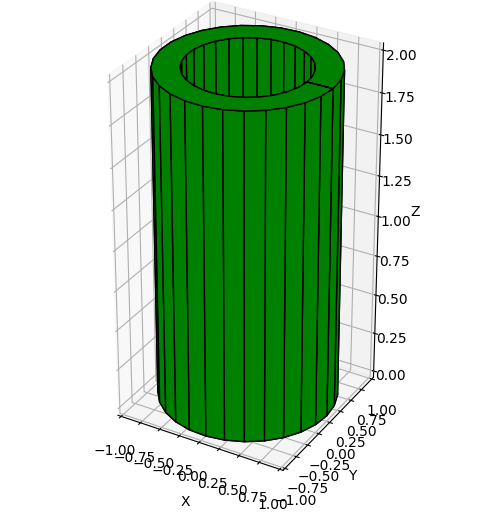

In [1167]:
draw_pol_cylinder()